In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from thermo_models.VLEEmpiricalModel import *
#Define empirical relationship
def xtoy(x):
    a, b = 9, -0.6
    y = a*x/(1+(a-1)*x) +b*x*(1 - x)
    return y

# Create a Raoult's law object
vle_model = VLEEmpiricalModelBinary(xtoy)
# Define the sliders:
xD1_slider = widgets.FloatSlider(value=0.95, min=0, max=1, step=0.0001, description='$x_D$:', readout_format='.2f')
xB1_slider = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.0001, description='$x_B$:', readout_format='.2f')
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')

def plot_distil_oplines_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    distillation_model = DistillationModel(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 3, figsize=(15, 5), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    axs = distillation_model.plot_distil_binary(axs = axs)
    plt.subplots_adjust(hspace=0)

def plot_distil_stripping_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    distillation_model = DistillationModel(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 1,figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    ax1 = axs[0]; ax1_fixed = axs[1]
    ax1 = distillation_model.plot_distil_strip(ax1 = ax1, ax1_fixed=ax1_fixed)
    plt.subplots_adjust(hspace=0)
    
def plot_distil_rectifying_ex2(xD=xD1_slider.value, xB=xB1_slider.value, R=R1_slider.value):
    distillation_model = DistillationModel(vle_model, xF = np.array([0.5, 0.5]), xD = np.array([xD, 1 - xD]), xB = np.array([xB, 1 - xB]), reflux = R)
    fig, axs = plt.subplots(2, 1,figsize=(7, 7), gridspec_kw={'height_ratios': [40, 1]}, sharex='col')
    ax2 = axs[0]; ax2_fixed = axs[1]
    ax2 = distillation_model.plot_distil_rect(ax2 = ax2, ax2_fixed=ax2_fixed)
    plt.subplots_adjust(hspace=0)

# Define the sliders:
xD2_slider = widgets.FloatSlider(value=0.95, min=0, max=1, step=0.0001, description='$x_D$:', readout_format='.2f')
xB2_slider = widgets.FloatSlider(value=0.05, min=0, max=1, step=0.0001, description='$x_B$:', readout_format='.2f')
r_max_slider = widgets.FloatSlider(value=1.0, min=0, max=100, step=1, description='R max:', readout_format='.1f')

def plot_r_vs_fixedpoints_ex2(r_max = r_max_slider.value, xD=xD2_slider.value, xB=xB2_slider.value):
    clear_output(wait=True)
    display("Calculating... Please wait.")
    r_values = np.linspace(0.001, r_max, 100)
    x_fixed_r_arr = []
    x_fixed_s_arr = []

    for r in tqdm(r_values, desc="Progress"):
        distillation_model = DistillationModel(vle_model, xF=np.array([0.5, 0.5]), xD=np.array([xD, 1 - xD]), xB=np.array([xB, 1 - xB]), reflux=r)
        x_fixed_r, _ = distillation_model.find_rect_fixedpoints_binary(100)
        x_fixed_s, _ = distillation_model.find_strip_fixedpoints_binary(100)
        x_fixed_r_arr.append(x_fixed_r)
        x_fixed_s_arr.append(x_fixed_s)

    # flatten the lists and repeat the r_values according to the number of x values
    r_values_r = np.repeat(r_values, [len(x) for x in x_fixed_r_arr])
    r_values_s = np.repeat(r_values, [len(x) for x in x_fixed_s_arr])
    x_fixed_r_arr = np.hstack(x_fixed_r_arr)
    x_fixed_s_arr = np.hstack(x_fixed_s_arr)

    plt.scatter(r_values_r, x_fixed_r_arr,marker = 'x')
    plt.scatter(r_values_s, x_fixed_s_arr, marker ='x')
    plt.xlabel("Reflux Ratio")
    plt.ylabel("x")
    plt.show()


interactive(children=(FloatSlider(value=0.95, description='$x_D$:', max=1.0, step=0.0001), FloatSlider(value=0…

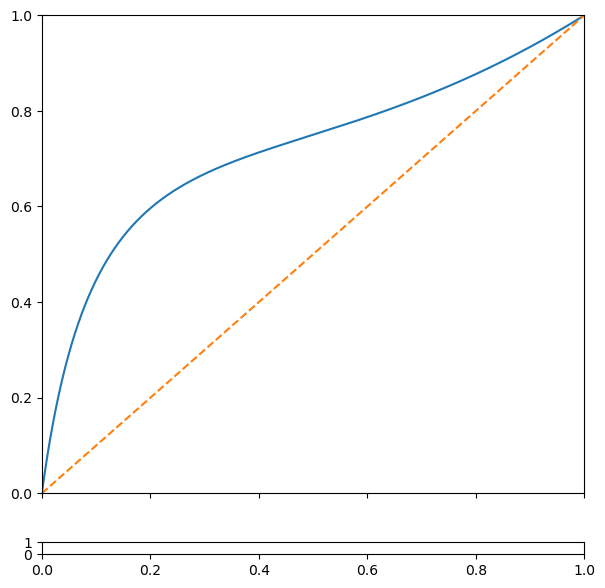

In [2]:
# Create the interactive widget:
rect_plot = widgets.interactive(plot_distil_rectifying_ex2, xD = xD1_slider, xB = xB1_slider, R = R1_slider)

display(rect_plot)

In [ ]:
# Create the interactive widget:
interactive_plot = widgets.interactive(plot_distil_oplines_ex2, xD = xD1_slider, xB = xB1_slider, R = R1_slider)

# Display the interactive widget:
display(interactive_plot)

interactive(children=(FloatSlider(value=0.95, description='$x_D$:', max=1.0, step=0.0001), FloatSlider(value=0…

In [ ]:
# Create the interactive widget:
fixed_points_reflux = widgets.interactive(plot_r_vs_fixedpoints_ex2, xD=xD2_slider, xB=xB2_slider, r_max = r_max_slider) 

# Display the interactive widget:
display(fixed_points_reflux)

interactive(children=(FloatSlider(value=1.0, description='R max:', readout_format='.1f', step=1.0), FloatSlide…